# KTL Customer Churn Project
## Business understanding

The industry of telecommunications is characterized by high competition, significant customer acquisition costs, and a relatively low switching barriers for customers. In this environment, customer churn, which is the phenomenon where customers stop doing business with a particular company which is critical and costly. It is more expensive to acquire a new customer than to retain the existing ones, and therefore important to predict whether a customer is about to churn and devise strategies to retain them.

* Customer churn represents a continuous financial bleed for a company, for instance, Safaricom PLC in the financial year 2024 reported a churn of 24.9% due to competition from Telkom Kenya and airtel.

* When the churn rate is high, it hits the company's profitability directly and can be indicative of the underlying issues with the service quality of the institution.

* Factors that contribute to a high churn rate often include poor customer service, more attractive plans from competitors, and poor service quality.

### Problem Statement

This project addresses the business problem of customer attrittion at KTL company. The inability to predict which customers are at high risk of churning makes it impossible for the company to deploy targeted and cost-effective retention strategies. Marketing efforts become broad and inefficient, wasting resources on loyal customers who are unlikely to leave while missing those on the verge of churning. 

This project will help alleviate the problem by building a predictive model that identifies customers with high probability of churn in order to proactively intervene with targeted offers, optimize marketing spend and gain actionable insights.


### Objectives
1. To accurately predict which customers are likely to churn from KTL services.
2. To understands the strategies that lead to customers churning from KTL company.
3. To reduce customer acquisition cost.
4. To inform strategies for retaining high risk churning customers.


### Metric of success
1.  The project will be successful if we can identify the factors that contributed to customers churning from KTL company.
2.  Achieve above 75% accuracy, and have a Recall of above 70%

# Data Understanding
In this section, we will look at the features of the data and the records available together with their relevance to the objectives of the project.

## Columns available in the KTL churn dataset.
**state**: The U.S. state of the customer (e.g., KS, OH).

**account length**: The number of days the customer has had an account.

**area code**: The area code of the customer's phone number.

**phone number**: The customer's phone number. (Unique identifier)

**international plan**: Whether the customer has an international plan (yes/no).

**voice mail plan**: Whether the customer has a voicemail plan (yes/no).

**number vmail messages**: The number of voicemail messages the customer has.

**total day minutes**: Total minutes of calls during the day.

**total day calls**: Total number of calls made during the day.

**total day charge**: Total monetary charge for day calls.

**total eve minutes**: Total minutes of calls during the evening.

**total eve calls**: Total number of calls made during the evening.

**total eve charge**: Total monetary charge for evening calls.

**total night minutes**: Total minutes of calls during the night.

**total night calls**: Total number of calls made during the night.

**total night charge**: Total monetary charge for night calls.

**total intl minutes**: Total minutes of international calls.

**total intl calls**: Total number of international calls made.

**total intl charge**: Total monetary charge for international calls.

**customer service calls**: The number of times the customer called the service center.

**churn**: Target Variable: Whether the customer left the service (True/False).


In [37]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [19]:
# load the dataset
df = pd.read_csv("telecom_churn.csv")

# check values of the head
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [20]:
# check the values of the tail
df.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


## Dataset relevance
The dataset is relevant for example churn has either true or false.

In [21]:
#check the number of columns and rows

print(f"There are {df.shape[0]} records and {df.shape[1]} columns ")


There are 3333 records and 21 columns 


In [22]:
# check the data types of the features in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

The dataset comprises of 16 numerical columns, 4 categorical columns and 1 boolean column.

In [23]:
# check stats summary
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [24]:
#Observation
df.describe(include=['object', 'boolean'])

,state,phone number,international plan,voice mail plan,churn
count,3333,3333,3333,3333,3333
unique,51,3333,2,2,2
top,WV,412-7606,no,no,False
freq,106,1,3010,2411,2850


Observed from above is that False appears frequently in the churn column.

In [25]:
# Check unique values
for column in df:
    unique_values = df[column].unique()
    print(f"{column}\n {unique_values}\n")
    

state
 ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']

account length
 [128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69 186 171  28 153 169  13  27   3  42 189 156 134 24

# Data Preparation]
## Data cleaning

In [26]:
#make a copy
df1 = df.copy(deep=True)

In [27]:
#check for null values
df1.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

There are no null values from the dataset.

In [28]:
del df1["phone number"]

In [29]:
df1.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [30]:
#check duplicates
df1.duplicated().sum()

0

There are no duplicates in the dataset.

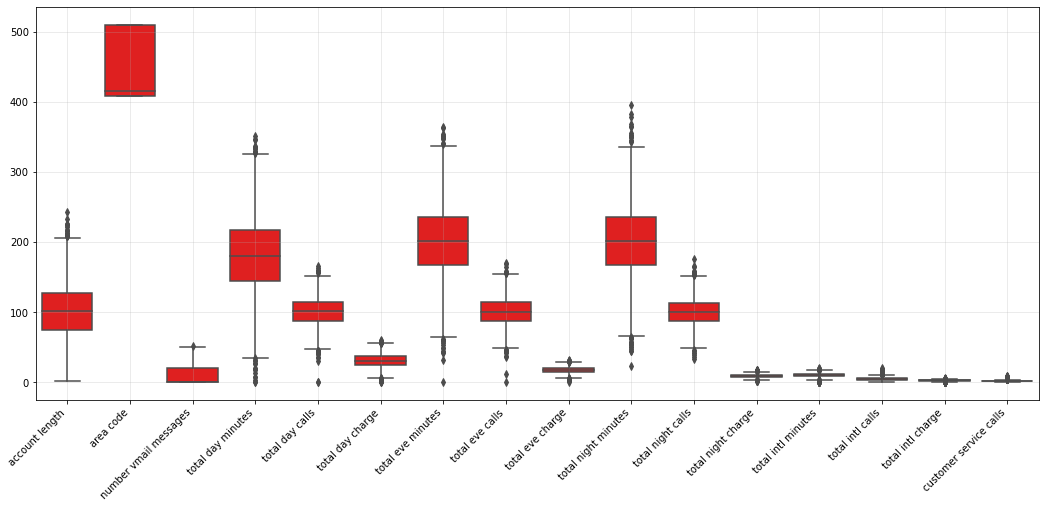

In [42]:
#check for outliers
plt.figure(figsize=(15, 6))
sns.boxplot(data=df1.select_dtypes(include=[np.number]),color="r")
plt.tight_layout()
plt.grid(alpha=.3)
plt.xticks(rotation=45, ha='right')
plt.show()


Total night minutes go from almost 0 upto 400 minutes while total day minutes start from 0 to about 350 which are show that they are geniune outliers.

## Exploratory Data Analysis
### Univariate analysis